In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
from PIL import ImageSequence

In [5]:
from typing import List

In [6]:
from typing import Tuple

In [7]:
from pathlib import Path

In [8]:
import numpy as np

In [9]:
from matplotlib.animation import FuncAnimation

In [10]:
from functools import partial

In [11]:
caseName  = "stairwellVsTunnel1"

In [12]:
imageIndicies = [5, 8, 7, 13]

In [13]:
def loadCaseprobabilityAnimations(caseName, imageIndicies): 
    probabilityAnimations = []
    potentialImages = []
    for imageIndex in imageIndicies: 
        probabilityAnimation = Image.open(Path(caseName) / str(imageIndex) / (str(imageIndex) + ".gif"))
        animation = []
        for frame in ImageSequence.Iterator(probabilityAnimation): 
            animation.append(frame.copy())
        probabilityAnimations.append(animation)
        potentialImages.append(Image.open(Path(caseName) / str(imageIndex) / (str(imageIndex) + "Potential.png")))
    return probabilityAnimations, potentialImages

In [14]:
cases = loadCaseprobabilityAnimations(caseName, imageIndicies)

In [19]:
def playCases(cases : Tuple[List[List[Image.Image]], List[Image.Image]], interval = 30): 
    images = cases[0]
    width : int = images[0][0].size[0]
    height : int = images[0][0].size[1]
    frameCount : int = len(images[0])
    caseCount : int = len(images)
    #animationFigure = plt.figure(figsize=(4, 4))
    subplots = plt.subplots(caseCount, 2, figsize=(10, 10))
    plt.tight_layout()
    animationFigure = subplots[0]
    axes = subplots[1]
    animationAxes = []
    potentialAxes = []
    for ii in range(len(images)): 
        #animationAxes[ii](animationFigure.add_subplot(caseCount, 1, (ii + 1)))
        animationAxes.append(axes[ii][0])
        potentialAxes.append(axes[ii][1])
        animationAxes[-1].get_xaxis().set_visible(False)
        animationAxes[-1].get_yaxis().set_visible(False) 
        potentialAxes[-1].get_xaxis().set_visible(False)
        potentialAxes[-1].get_yaxis().set_visible(False) 
    animationFrames = []
    for imageIndex, image in enumerate(images): 
        animationFrames.append(animationAxes[imageIndex].imshow(image[imageIndex], zorder=1, extent=(0, width, 0, height)))
        potentialAxes[imageIndex].imshow(cases[1][imageIndex], zorder = 1, extent=(0, width, 0, height))
    def animateFrame(frameIndex_ : int): 
        for imageIndex, animationFrame in enumerate(animationFrames): 
            animationFrames[imageIndex].set_data(images[imageIndex][frameIndex_])
            animationFrames[imageIndex].set_zorder(1)
        return animationFrames, 
    animation = FuncAnimation(
            animationFigure, 
            animateFrame, 
            interval = interval, 
            frames = np.arange(0, len(images[0]), 1), 
            repeat = True, 
            blit = True
        )
    return animation

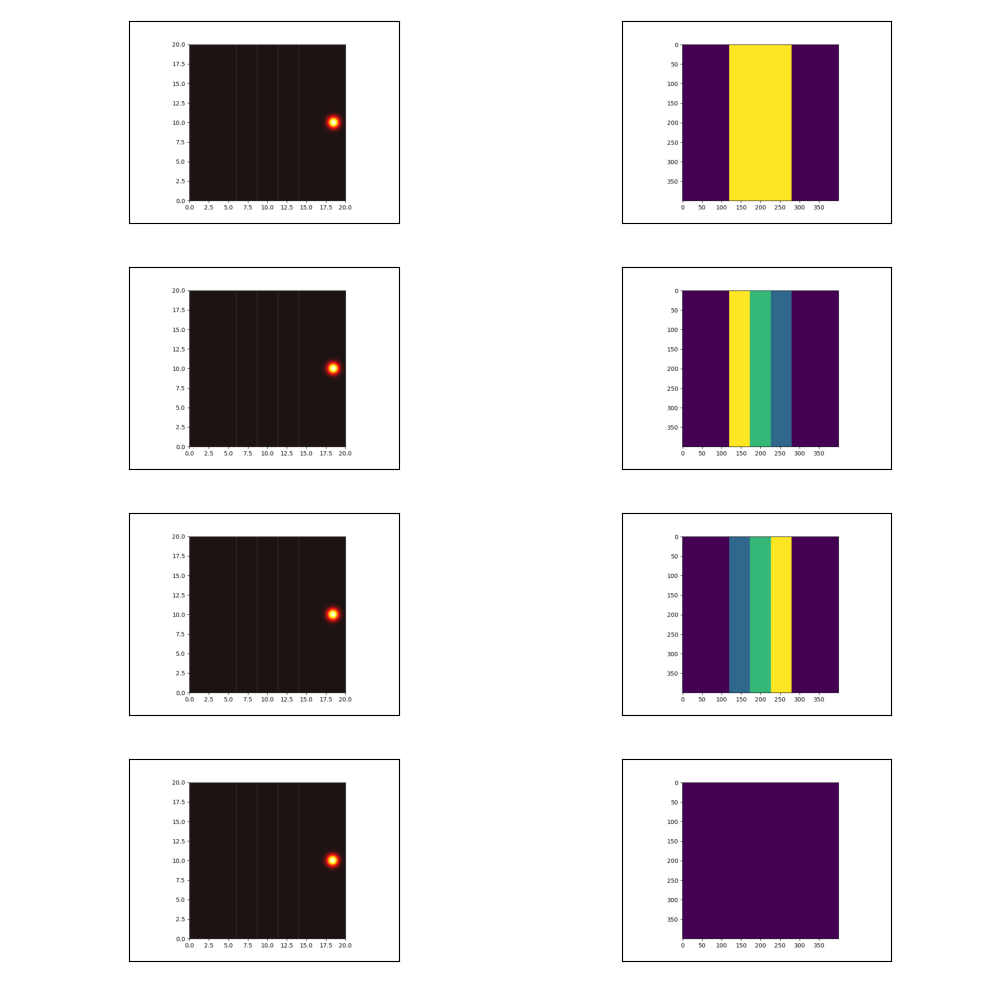

In [20]:
plt.close()
animation = playCases(cases, 100)

In [21]:
videoPath = Path.cwd() / caseName / "sideBySide"
videoPath.mkdir(parents = True, exist_ok = True)
videoPath = videoPath / ("_".join([str(index) for index in imageIndicies]) + ".gif")
animation.save(str(videoPath))